In [3]:
#Marketing Campaign Analysis of Wine Business
#import useful packages
import pandas as pd
import seaborn as sns
from scipy import stats
import  matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime,timedelta
import numpy as np
import os

/Users/linpingping/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#1.Data loading and processing 数据读取和初步处理
#load data 读取数据
filepath = "/Users/Linpingping/Desktop/marketing_campaign.csv"
df_wine = pd.read_csv(filepath,sep = ';')

In [3]:
#check the dataset 查看数据集包含字段，列值据格式
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df_wine.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#check missing values 检查空值
null_sum = df_wine.isnull().sum()
for column, count in null_sum.items():
    print(f"column'{column}':{count} null values \n")

column'ID':0 null values 

column'Year_Birth':0 null values 

column'Education':0 null values 

column'Marital_Status':0 null values 

column'Income':24 null values 

column'Kidhome':0 null values 

column'Teenhome':0 null values 

column'Dt_Customer':0 null values 

column'Recency':0 null values 

column'MntWines':0 null values 

column'MntFruits':0 null values 

column'MntMeatProducts':0 null values 

column'MntFishProducts':0 null values 

column'MntSweetProducts':0 null values 

column'MntGoldProds':0 null values 

column'NumDealsPurchases':0 null values 

column'NumWebPurchases':0 null values 

column'NumCatalogPurchases':0 null values 

column'NumStorePurchases':0 null values 

column'NumWebVisitsMonth':0 null values 

column'AcceptedCmp3':0 null values 

column'AcceptedCmp4':0 null values 

column'AcceptedCmp5':0 null values 

column'AcceptedCmp1':0 null values 

column'AcceptedCmp2':0 null values 

column'Complain':0 null values 

column'Z_CostContact':0 null values 

column'Z_

In [6]:
# fill missing values 处理空值
df_wine['Income'].fillna(df_wine['Income'].mean)
df_wine

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
#check duplicated rows检查重复值
df_duplicates = df_wine.duplicated()
df_duplicates.sum()
#no duplicates 无重复行

0

In [12]:
#2.UserPersona Analysis 用户画像分析
#2.1 Age distribution 用户年龄分布
current_date = datetime.now()
df_wine['Age'] = (current_date.year - df_wine['Year_Birth'])
df_wine['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [13]:
#Get unique user ids 检查id是否重复
unique_ids = df_wine['ID'].unique()
len(unique_ids)

2240

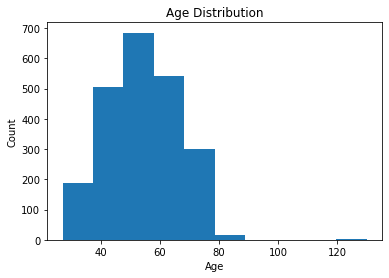

In [14]:
#create histagram of age 年龄分布直方图
df_age = df_wine['Age']
df_age.plot(kind ='hist', x = 'Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

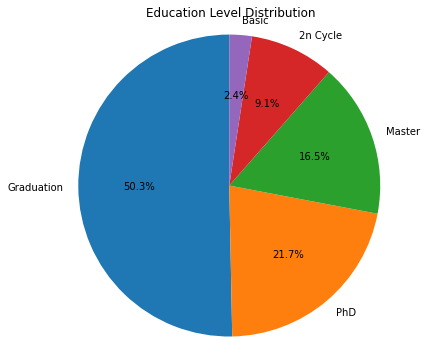

In [15]:
#2.2Education level distribution 用户教育水平分布
df_wine['Education'].unique()
edu_counts = df_wine['Education'].value_counts()
labels = edu_counts.index
counts = edu_counts.values

plt.figure(figsize= (6,6))
plt.pie(counts, labels = labels, autopct = '%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Education Level Distribution')
plt.show()

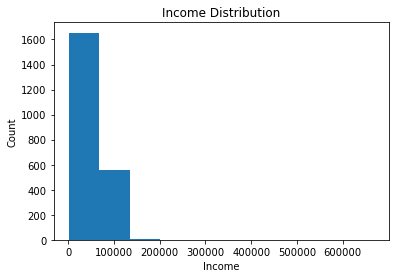

In [16]:
#2.3 Income distribution 用户收入分布
df_income = df_wine['Income']
df_income.plot(kind='hist', x = 'Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

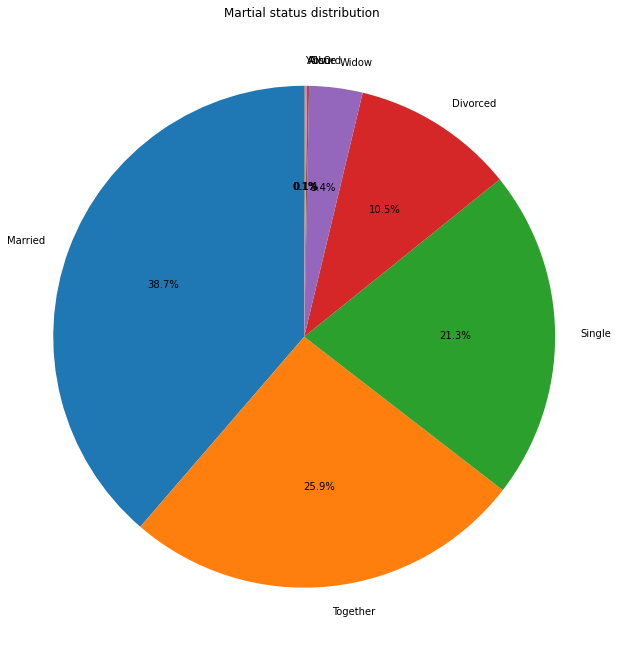

In [29]:
#2.4 Marital Status Districution 用户婚姻状态分布
df_marital = df_wine['Marital_Status']
marital_counts = df_marital.value_counts()
labels = marital_counts.index
counts = marital_counts.values
plt.figure(figsize =(10,10))
plt.pie(counts, labels = labels, autopct= '%1.1f%%', startangle=90) 
plt.axis('equal')
plt.title('Martial status distribution')
plt.subplots_adjust(top= 1)  # 调整顶部边缘的位置
plt.show()

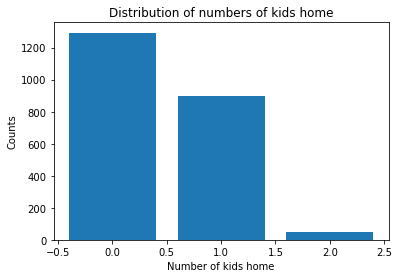

In [17]:
#2.5 Number of kids home distribution 用户家庭子女数量分布
df_kid = df_wine['Kidhome']
kid_counts = df_kid.value_counts()
plt.bar(kid_counts.index,kid_counts.values)
plt.title('Distribution of numbers of kids home')
plt.xlabel('Number of kids home')
plt.ylabel('Counts')
plt.show()

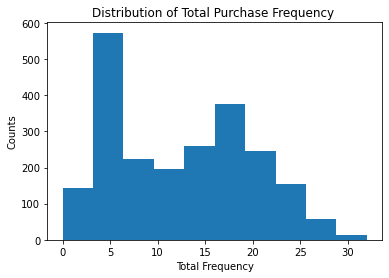

In [18]:
#2.6 Total purchase frequency distribution 用户消费总频次分布
df_wine['total_frequency'] = df_wine['NumWebPurchases']+df_wine['NumCatalogPurchases']+df_wine['NumStorePurchases']
df_wine['total_frequency'].plot(kind = 'hist', x = 'total_frequency')
plt.title('Distribution of Total Purchase Frequency ')
plt.xlabel('Total Frequency')
plt.ylabel('Counts')
plt.show()


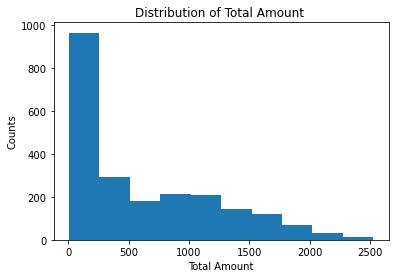

In [19]:
#2.6 Total purchase frequency distribution 用户消费总频次分布
df_wine['total_amount'] = df_wine['MntWines'] + df_wine['MntFruits'] + df_wine['MntMeatProducts'] + df_wine['MntFishProducts'] + df_merged['MntSweetProducts'] + df_merged['MntGoldProds']
df_wine['total_amount'].plot(kind = 'hist', x = 'total_frequency')
plt.title('Distribution of Total Amount ')
plt.xlabel('Total Amount')
plt.ylabel('Counts')
plt.show()

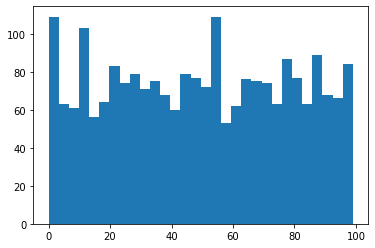

In [20]:
#2.7 Recency Distribution 最近一次消费时间分布
df_recency = df_wine['Recency']
plt.hist(df_recency, bins = 30)
plt.show()

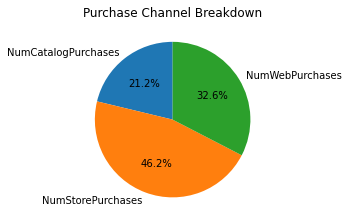

In [21]:
#3.User Purchase Preference Analysis 用户购买行为偏好分析
#3.1 Purchase frequency by channels 各渠道用户购买频次分布
df_channel = pd.DataFrame(df_wine.loc[:,('NumCatalogPurchases','NumStorePurchases','NumWebPurchases')].sum())

df_channel.columns = ['Number of purchases']
df_channel

plt.pie(df_channel['Number of purchases'], labels = df_channel.index, autopct= '%1.1f%%', startangle=90)
plt.title('Purchase Channel Breakdown')
plt.subplots_adjust(top= 0.8)
plt.show()

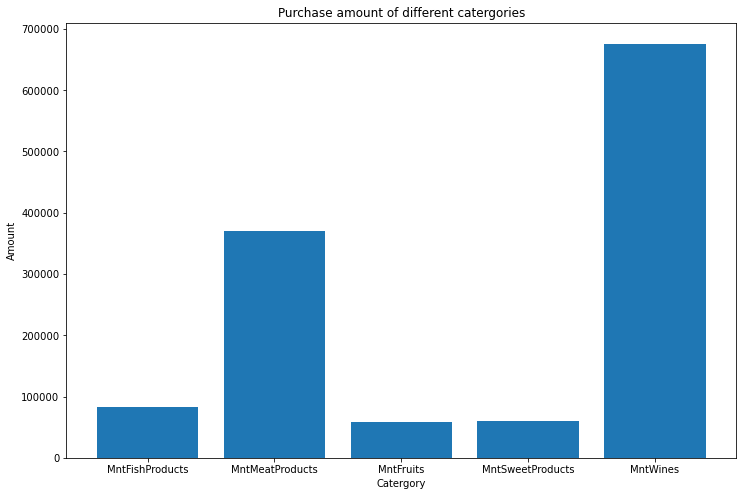

In [52]:
#3.2 Purchase ammount by categories 各品类用户消费金额对比
df_cater = pd.DataFrame(df_wine.loc[:,('MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines')].sum())
df_cater

plt.figure(figsize =(12,8))
plt.bar(df_cater.index,df_cater.iloc[:,0])
plt.title('Purchase amount of different catergories')
plt.xlabel('Catergory')
plt.ylabel('Amount')
plt.show()

In [22]:
#3.3 Campaign feedbacks 各活动的用户反馈情况
accepted_campaigne_columns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
counts_accepted = df_wine[accepted_campaigne_columns].sum()
counts_rejected = df_wine[accepted_campaigne_columns].eq(0).sum()
print("Counts of accepted campaigns(1):")
print(counts_accepted)
print("Counts of rejected campaigns(1):")
print(counts_rejected)

Counts of accepted campaigns(1):
AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
dtype: int64
Counts of rejected campaigns(1):
AcceptedCmp1    2096
AcceptedCmp2    2210
AcceptedCmp3    2077
AcceptedCmp4    2073
AcceptedCmp5    2077
dtype: int64


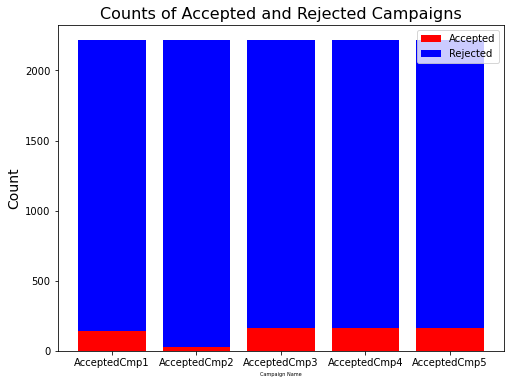

In [51]:
plt.figure(figsize = (8,6))
colors = ['red','blue']
bar_width = 0.4
x_ticks = np.arange(len(accepted_campaigne_columns))

plt.bar(accepted_campaigne_columns,counts_accepted,color = colors[0],label = 'Accepted')
plt.bar(accepted_campaigne_columns, counts_rejected, bottom=counts_accepted,color = colors[1],label = 'Rejected')
plt.xlabel('Campaign Name', fontsize = 5)
plt.ylabel('Count', fontsize = 14)
plt.title('Counts of Accepted and Rejected Campaigns',fontsize = 16)
plt.legend()
plt.show()

In [23]:
# Summarize the campaign result 总结活动效果
accpeted_ratio = (counts_accepted / len(df_wine))*100
print("Accepted Ratio")
print(accpeted_ratio.round(2))
print(df_wine.groupby('Response').size())

Accepted Ratio
AcceptedCmp1    6.43
AcceptedCmp2    1.34
AcceptedCmp3    7.28
AcceptedCmp4    7.46
AcceptedCmp5    7.28
dtype: float64
Response
0    1906
1     334
dtype: int64


In [25]:
#4.Correlation exploration 相关性分析
#4.1 drop ID column 去掉用户id
data =  df_wine.copy()
data = data.drop(['ID'], axis = 1)

#4.2 Redefine user features into numeric values 编译用户特征为数值
data['Education'] = data['Education'].map({'Graduation':1,'PhD':1,'Master':1,'Basic':0,'2n Cycle':0})
data['Marital_Status'] = data['Marital_Status'].map({'Single':0, 'Together':1, 'Married':2, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0})
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_frequency,total_amount
0,1957,1,0,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,66,22,1617
1,1954,1,0,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,69,4,27
2,1965,1,1,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,58,20,776
3,1984,1,1,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,39,6,53
4,1981,1,2,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,42,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,2,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,3,11,0,56,16,1341
2236,1946,1,1,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,3,11,0,77,15,444
2237,1981,1,0,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,3,11,0,42,18,1241
2238,1956,1,1,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,3,11,0,67,21,843


In [26]:
#4.3 processing enroll date column 处理注册日期
date_data = data.copy()
date_data['Dt_Customer'] = pd.to_datetime(date_data['Dt_Customer'])
list_month = [date_data['Dt_Customer'][i].month for i in range(date_data.shape[0])]
date_data['enroll_month'] = list_month

def date_to_weekday(date_value):
    return date_value.weekday()

date_data['enroll_weekday'] = date_data['Dt_Customer'].apply(date_to_weekday)

date_data = date_data.drop(['Dt_Customer'],axis = 1)

date_data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_frequency,total_amount,enroll_month,enroll_weekday
0,1957,1,0,58138.0,0,0,58,635,88,546,...,0,0,3,11,1,66,22,1617,9,1
1,1954,1,0,46344.0,1,1,38,11,1,6,...,0,0,3,11,0,69,4,27,3,5
2,1965,1,1,71613.0,0,0,26,426,49,127,...,0,0,3,11,0,58,20,776,8,2
3,1984,1,1,26646.0,1,0,26,11,4,20,...,0,0,3,11,0,39,6,53,2,0
4,1981,1,2,58293.0,1,0,94,173,43,118,...,0,0,3,11,0,42,14,422,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,2,61223.0,0,1,46,709,43,182,...,0,0,3,11,0,56,16,1341,6,3
2236,1946,1,1,64014.0,2,1,56,406,0,30,...,0,0,3,11,0,77,15,444,6,1
2237,1981,1,0,56981.0,0,0,91,908,48,217,...,0,0,3,11,0,42,18,1241,1,5
2238,1956,1,1,69245.0,0,1,8,428,30,214,...,0,0,3,11,0,67,21,843,1,4


In [28]:
#4.4 drop unuseful columns 去掉不需要的列
data_with_dummies = date_data.copy()
data_with_dummies = data_with_dummies.drop(['Z_CostContact'], axis = 1)
data_with_dummies = data_with_dummies.drop(['Z_Revenue'], axis = 1)

In [29]:
#4.5 Response 的相关性探索
response_corr = data_with_dummies.corr()['Response'].sort_values(ascending = False)
response_corr

#Conclusion: Based on the analysis, it can be concluded that the variables AcceptedCmp5, AcceptedCmp1, and total_amount have the strongest positive correlation with users' response to campaigns. Classification models can be further applied to predict users' response to campaigns.

Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
total_amount           0.265298
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
total_frequency        0.164688
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.133047
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Education              0.056318
NumStorePurchases      0.039363
enroll_month           0.032677
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.021325
enroll_weekday        -0.060555
Kidhome               -0.080008
Marital_Status        -0.128403
Teenhome              -0.154446
Recency               -0.198437
Name: Response, dtype: float64

In [33]:
#4.6 total_amount 的相关性探索
total_mnt_corr = data_with_dummies.drop(['MntWines','MntMeatProducts','MntFishProducts','MntFruits','MntSweetProducts','MntGoldProds','total_frequency'],axis = 1).corr()['total_amount'].sort_values(ascending = False)

total_mnt_corr

#Conclusion: Based on the analysis, it can be concluded variables NumCatalogPurchases, NumStorePurchases, Income, NumWebPurchases have the strongest positive correlation with  total amount, while vaiable kidhome has the strongest negtive correlation with total amount. Linear regression model can be applied to explore NumCatalogPurchases' correlation with total amount. 

total_amount           1.000000
NumCatalogPurchases    0.778577
NumStorePurchases      0.674669
Income                 0.667576
NumWebPurchases        0.519837
AcceptedCmp5           0.470058
AcceptedCmp1           0.381523
Response               0.265298
AcceptedCmp4           0.253290
AcceptedCmp2           0.135813
Education              0.117435
Age                    0.111306
AcceptedCmp3           0.053385
enroll_month           0.037400
Recency                0.020433
enroll_weekday        -0.018654
Marital_Status        -0.021038
Complain              -0.037058
NumDealsPurchases     -0.065112
Year_Birth            -0.111306
Teenhome              -0.138384
NumWebVisitsMonth     -0.500218
Kidhome               -0.556669
Name: total_amount, dtype: float64